In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('../data/train.csv')
df.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Dictionary

#### keep
- Demographics
- Physical measures
- PCIAT
- PreInt_EduHx-computerinternet_hoursday


Which columns make sense to keep?
- Age
- Sex
- CGAS-CGAS_Score (impairment score)
- Physical-BMI
- 

In [74]:
# for row in dictionary.loc[np.where(dictionary['Field'].str.startswith("PCIAT"))][['Field', 'Description']].iterrows():
#     print(row[1]['Field'], "|", row[1]['Description'])

In [109]:
dictionary = pd.read_csv("../data/data_dictionary.csv")

dictionary[~dictionary['Field'].str.startswith("PCIAT")]

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN


In [78]:
columns_to_keep = [
    'Basic_Demos-Age', 'Basic_Demos-Sex', # Demographics
    'CGAS-CGAS_Score', 'Physical-BMI',
    'BIA-BIA_Activity_Level_num',
    # 'Physical-Height', 'Physical-Weight', 
    # 'Physical-Waist_Circumference', # Physical measures
    #    'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
#     'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', # Parents survey
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
#    'PCIAT-PCIAT_Total',
    'PreInt_EduHx-computerinternet_hoursday', # Hours of internet use per day,
    'sii'
]

In [80]:
df = df.dropna(subset='sii') # Drop rows with missing ssi
df = df[columns_to_keep]

df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

<Axes: xlabel='sii'>

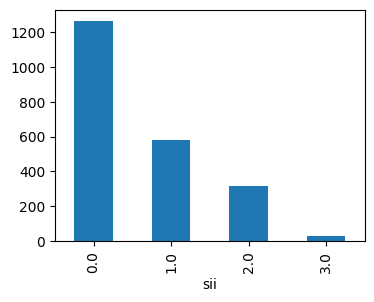

In [85]:
df_train['sii'].value_counts().plot(kind='bar', figsize=(4, 3))

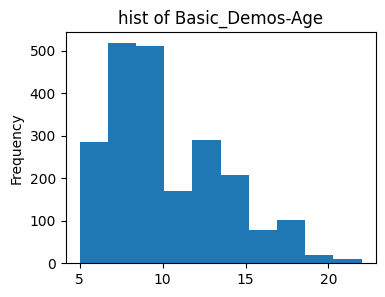

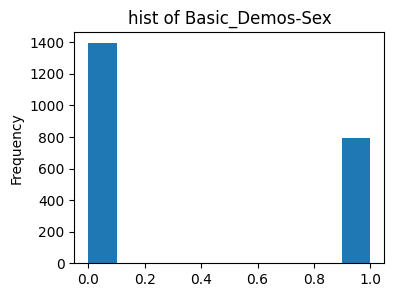

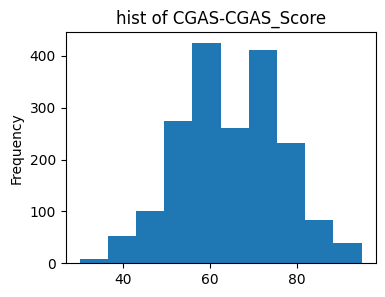

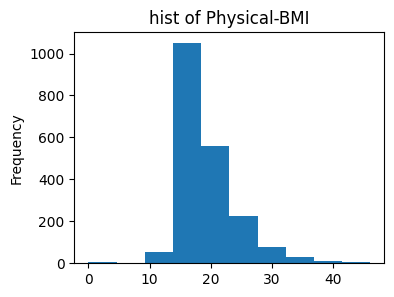

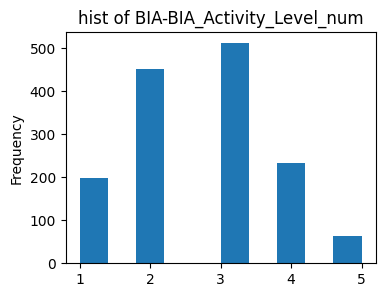

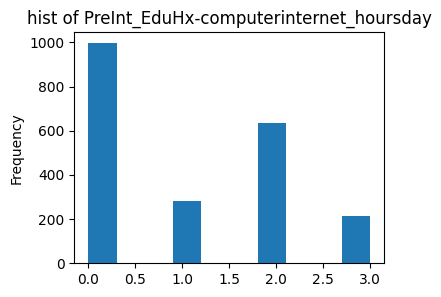

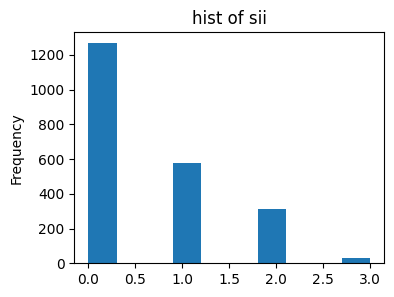

In [89]:
for column_name in df.columns.tolist():
    df_train[column_name].plot(kind='hist', figsize=(4, 3))
    plt.title(f"hist of {column_name}")
    plt.show()


In [90]:
df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,BIA-BIA_Activity_Level_num,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0,51.0,16.877316,2.0,3.0,2.0
1,9,0,NaN,14.035590,2.0,0.0,0.0
2,10,1,71.0,16.648696,NaN,2.0,0.0
3,9,0,71.0,18.292347,3.0,0.0,1.0
5,13,1,50.0,22.279952,2.0,0.0,1.0


<Axes: xlabel='Basic_Demos-Age', ylabel='Count'>

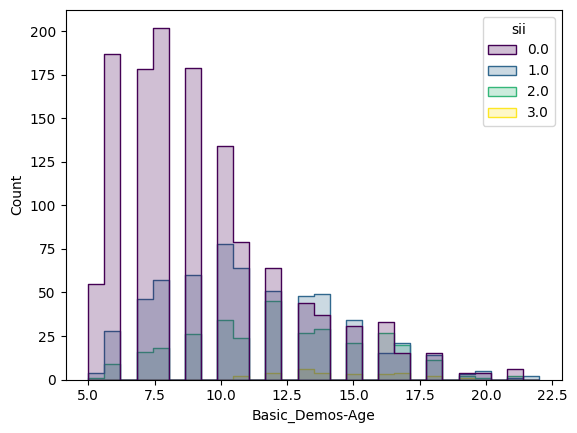

In [103]:
sns.histplot(data=df_train, x='Basic_Demos-Age', hue='sii', palette='viridis', element='step')

<Axes: xlabel='sii', ylabel='Count'>

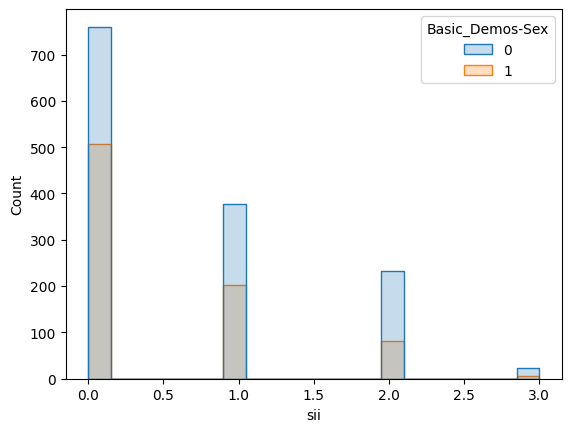

In [112]:
sns.histplot(data=df_train, x='sii', hue='Basic_Demos-Sex', element='step')

<Axes: xlabel='Basic_Demos-Age'>

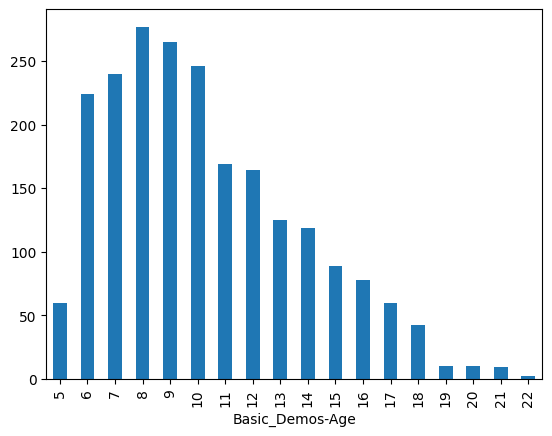

In [108]:
df_train['Basic_Demos-Age'].value_counts().sort_index(
    ascending=True
).plot(kind='bar')

<Axes: xlabel='CGAS-CGAS_Score', ylabel='Count'>

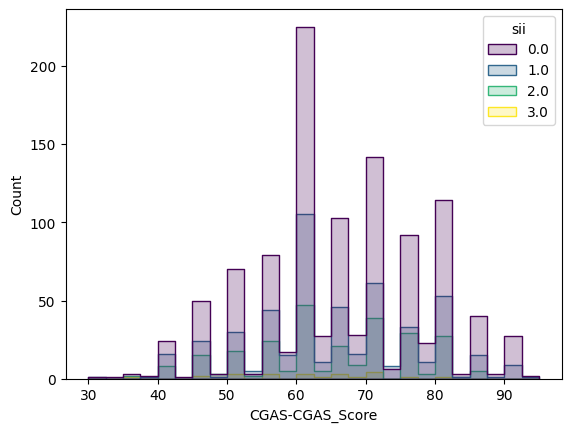

In [119]:
sns.histplot(data=df_train, x='CGAS-CGAS_Score', hue='sii', palette='viridis', element='step')

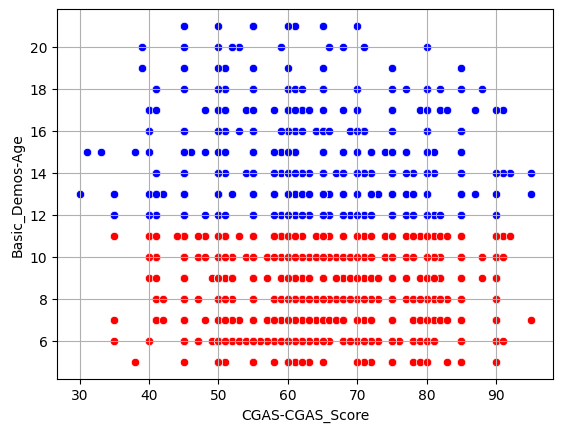

In [145]:
# How is CGAS tracking with age?
sns.scatterplot(x='CGAS-CGAS_Score', y='Basic_Demos-Age', data=df_train[df_train['Basic_Demos-Age'] < 12], color='red')
sns.scatterplot(x='CGAS-CGAS_Score', y='Basic_Demos-Age', data=df_train[df_train['Basic_Demos-Age'] >= 12], color='blue')
plt.grid()

<Axes: xlabel='Physical-BMI', ylabel='Count'>

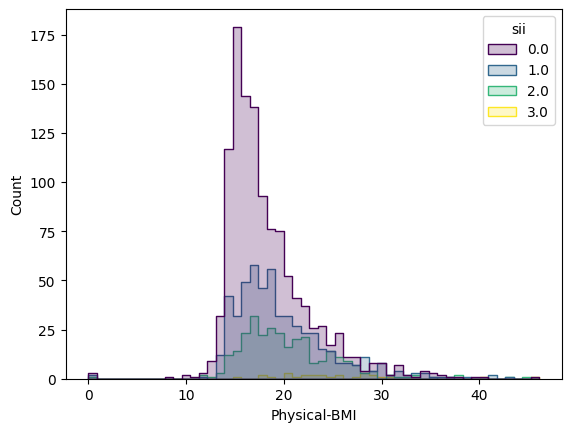

In [148]:
sns.histplot(data=df_train, x='Physical-BMI', hue='sii', palette='viridis', element='step')

<Axes: xlabel='Basic_Demos-Age', ylabel='Physical-BMI'>

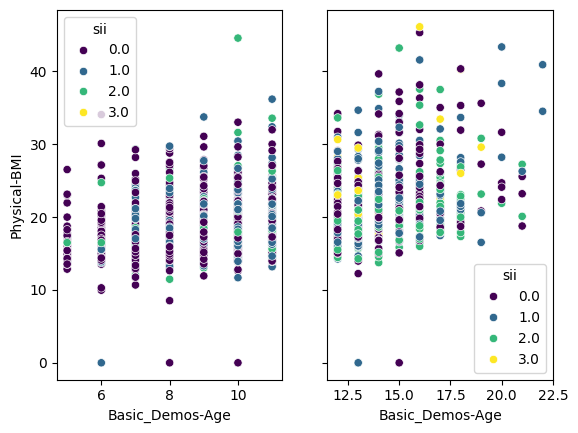

In [161]:
# How is CGAS tracking with age?
fig, ax = plt.subplots(1, 2, sharey=True)
sns.scatterplot(y='Physical-BMI', x='Basic_Demos-Age', data=df_train[df_train['Basic_Demos-Age'] < 12], hue='sii', palette='viridis', ax=ax[0])
sns.scatterplot(y='Physical-BMI', x='Basic_Demos-Age', data=df_train[df_train['Basic_Demos-Age'] >= 12], hue='sii', palette='viridis', ax=ax[1])

<Axes: xlabel='BIA-BIA_Activity_Level_num', ylabel='Count'>

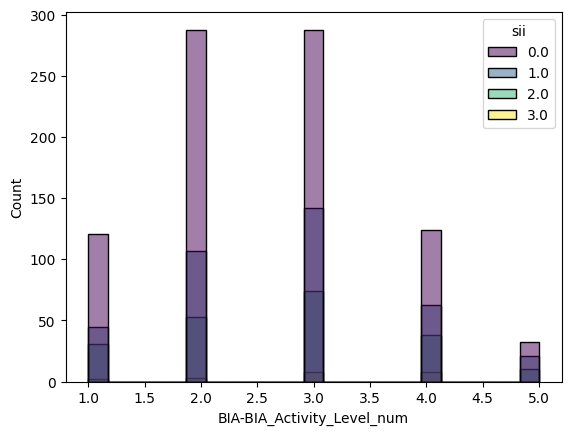

In [167]:

# fig, ax = plt.subplots(1, 2, sharey=True)
sns.histplot(x='BIA-BIA_Activity_Level_num', data=df_train, hue='sii', palette='viridis')
# sns.histplot(x='BIA-BIA_Activity_Level_num', data=df_train[df_train['Basic_Demos-Age'] >= 12], hue='sii', palette='viridis', ax=ax[1])

<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='Count'>

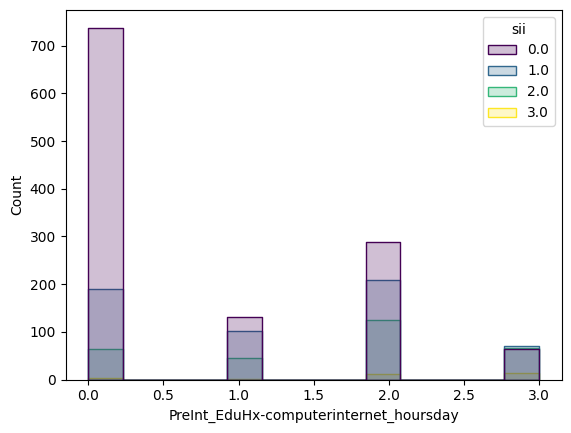

In [168]:
sns.histplot(data=df_train, x='PreInt_EduHx-computerinternet_hoursday', hue='sii', palette='viridis', element='step')


<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='Count'>

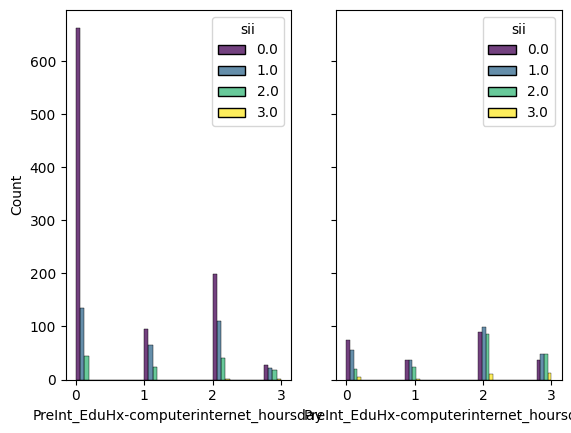

In [178]:
# How is CGAS tracking with age?
fig, ax = plt.subplots(1, 2, sharey=True)
sns.histplot(x='PreInt_EduHx-computerinternet_hoursday', data=df_train[df_train['Basic_Demos-Age'] < 12], hue='sii', palette='viridis', ax=ax[0], multiple='dodge')
sns.histplot(x='PreInt_EduHx-computerinternet_hoursday', data=df_train[df_train['Basic_Demos-Age'] >= 12], hue='sii', palette='viridis', ax=ax[1], multiple='dodge')